In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import array as arr

In [39]:
file_name = 'C:\\Users\\Aich Kay\\Desktop\\Anaconda3\\data science 1\\ds project nhl\\nhl-game-data\\\game_teams_stats.csv'
f=open(file_name,'r')
df = pd.read_csv(file_name, ',')
df.isnull().sum() #none of the columns are missing any data
file_name_2 = 'C:\\Users\\Aich Kay\\Desktop\\Anaconda3\\data science 1\\ds project nhl\\nhl-game-data\\game_skater_stats.csv'
f=open(file_name_2,'r')
df2 = pd.read_csv(file_name_2, ',')


In [4]:
list(df.columns)

['game_id',
 'team_id',
 'HoA',
 'won',
 'settled_in',
 'head_coach',
 'goals',
 'shots',
 'hits',
 'pim',
 'powerPlayOpportunities',
 'powerPlayGoals',
 'faceOffWinPercentage',
 'giveaways',
 'takeaways']

In [5]:
sorted(df)

['HoA',
 'faceOffWinPercentage',
 'game_id',
 'giveaways',
 'goals',
 'head_coach',
 'hits',
 'pim',
 'powerPlayGoals',
 'powerPlayOpportunities',
 'settled_in',
 'shots',
 'takeaways',
 'team_id',
 'won']

In [6]:
df['head_coach'].unique()

array(['Peter DeBoer', 'Peter Laviolette', 'Darryl Sutter', 'Guy Boucher',
       'Claude Julien', 'John Tortorella', 'Dan Bylsma', 'Mike Babcock',
       'Todd McLellan', 'Barry Trotz', 'Alain Vigneault',
       'Joel Quenneville', 'Paul MacLean', 'Michel Therrien', 'Mike Yeo',
       'Bruce Boudreau', 'Ken Hitchcock', 'Terry Murray', 'Dave Tippett',
       'Randy Carlyle', 'Jack Capuano', 'Adam Oates', 'Jacques Martin',
       'Kevin Dineen', 'Dale Hunter', 'Lindy Ruff', 'Glen Gulutzan',
       'Jon Cooper', 'Mike Sullivan', 'Dave Hakstol', 'Mike Johnston',
       'Patrick Roy', 'John Torchetti', 'Dave Cameron', 'Gerard Gallant',
       'Paul Maurice', 'Jeff Blashill', 'Bob Hartley',
       'Willie Desjardins', 'Bruce Cassidy', 'Craig Berube',
       'Todd Richards', 'John Stevens', 'John Hynes', 'Jared Bednar',
       'Kirk Muller', 'Ron Rolston', 'Claude Noel', 'Ted Nolan',
       'Joe Sacco', 'Ralph Krueger', 'Peter Horachek', 'Dallas Eakins',
       'Martin Raymond', 'Dan Lacroix

In [7]:
df_temp = df[df['won'] == 1]
print(df.groupby('head_coach').count())
print(df_temp.groupby('head_coach')['won'].count())

                   game_id  team_id  HoA  won  settled_in  goals  shots  hits  \
head_coach                                                                      
Adam Oates             183      183  183  183         183    183    183   183   
Alain Vigneault        717      717  717  717         717    717    717   717   
Barry Trotz            797      797  797  797         797    797    797   797   
Bill Peters            415      415  415  415         415    415    415   415   
Bob Boughner           164      164  164  164         164    164    164   164   
...                    ...      ...  ...  ...         ...    ...    ...   ...   
Todd Richards          348      348  348  348         348    348    348   348   
Tom Renney             164      164  164  164         164    164    164   164   
Tom Rowe                60       60   60   60          60     60     60    60   
Travis Green           164      164  164  164         164    164    164   164   
Willie Desjardins      321  

In [25]:
#df = df.groupby('domain')['ID'].nunique()

tot = df.groupby('head_coach')['won'].count()
print(tot)
ratio = df_temp.groupby('head_coach')['won'].count()*100/tot
print(sorted(round(ratio,2)))


#f1_temp = df3[(df3['Survived']==1) & (df3['Sex'] =='female') & (df3['Pclass']==j)] 

head_coach
Adam Oates           183
Alain Vigneault      717
Barry Trotz          797
Bill Peters          415
Bob Boughner         164
                    ... 
Todd Richards        348
Tom Renney           164
Tom Rowe              60
Travis Green         164
Willie Desjardins    321
Name: won, Length: 83, dtype: int64
[20.0, 27.27, 27.78, 31.86, 32.41, 34.76, 35.37, 36.0, 36.59, 36.96, 37.25, 38.56, 39.02, 39.02, 39.58, 40.0, 40.24, 41.04, 41.14, 41.46, 41.46, 42.42, 42.64, 42.65, 42.78, 42.99, 43.04, 45.2, 45.21, 45.3, 45.57, 46.3, 46.32, 46.75, 46.77, 47.56, 47.66, 47.75, 48.09, 48.28, 48.36, 48.78, 48.99, 49.0, 49.45, 49.51, 49.53, 49.59, 50.0, 50.27, 50.35, 50.48, 50.78, 51.17, 51.29, 51.3, 51.36, 51.52, 52.14, 52.57, 52.63, 53.19, 53.85, 53.95, 54.05, 54.31, 54.66, 55.11, 55.63, 55.92, 56.15, 56.35, 56.46, 59.13, 59.66, nan, 59.18, nan, 54.66, 55.67, 57.3, 58.08, 100.0]


In [26]:
avg = df.groupby('head_coach')['won'].agg(['count','mean']).reset_index()
avg
avg.sort_values(by='mean', ascending=False)

,head_coach,count,mean
19,Dan Lacroix,1,1.000000
9,Bruce Cassidy,233,0.596567
32,Jacques Lemaire,49,0.591837
45,Jon Cooper,575,0.591304
55,Mike Sullivan,365,0.580822
...,...,...,...
73,Ted Nolan,144,0.277778
41,John MacLean,33,0.272727
27,Eddie Oatman,5,0.200000
14,Craig MacTavish,5,0.000000


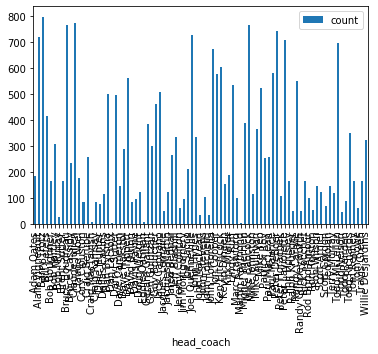

In [152]:
avg.plot(x='head_coach', y='count', kind='bar')

,head_coach,count,mean
2,Barry Trotz,797,0.564617
10,Claude Julien,773,0.539457
53,Mike Babcock,766,0.511749
8,Bruce Boudreau,764,0.561518
39,Joel Quenneville,726,0.559229
1,Alain Vigneault,717,0.563459
62,Peter Laviolette,708,0.546610
75,Todd McLellan,696,0.512931
44,John Tortorella,673,0.531947
46,Ken Hitchcock,604,0.556291


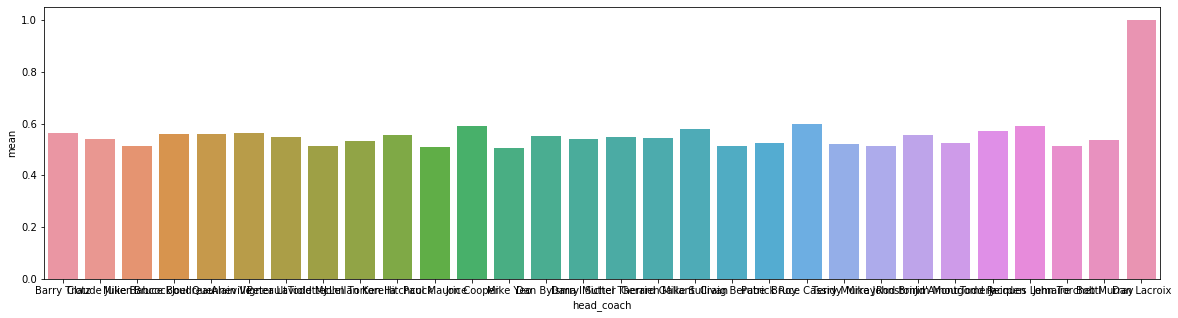

In [126]:
import seaborn as sns
plt.figure(figsize=(20,5))
avg_temp = avg.nlargest(30,['mean']).sort_values('count',ascending=False)
#avg.nlargest(30,['mean']).plot(x='head_coach', y='count', kind='bar')
#sns.barplot(x='head_coach', y="count", data=avg_temp, order=avg_temp['head_coach'])
sns.barplot(x='head_coach', y="mean", data=avg_temp, order=avg_temp['head_coach'])
avg_temp

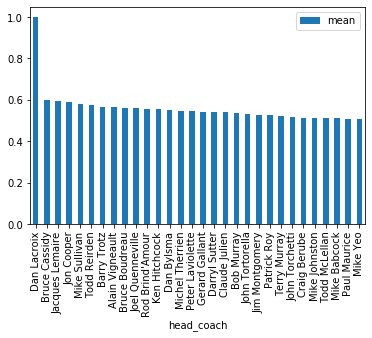

In [127]:
avg.nlargest(30,['mean']).plot(x='head_coach', y='mean', kind='bar')

In [ ]:
###########################

In [316]:

temp1 = df[['game_id','won','team_id']]  # game teams stats has game id, team id, outcome
df2 = df2
#temp2 = df2[['game_id','assists']]       #skater team stats data, game id assists etc.
#temp2 = temp2.drop_duplicates(subset=['game_id'])

temp2 = df2.groupby(['game_id','team_id'])['assists'].sum()
temp2 = pd.DataFrame(data=temp2).reset_index()
#df_assists= pd.merge(temp1,temp2, on=['game_id'])
#df_assists['assists'].unique()

#df_assists = temp1.set_index('game_id').join(temp2.set_index('game_id'))
#df_assists #prints teams and assists in tht game
#df_assists = df_assists.drop_duplicates(subset=['team_id'])
#df_assists
temp2

,game_id,team_id,assists
0,2010020001,8,2
1,2010020001,10,5
2,2010020002,4,4
3,2010020002,5,4
4,2010020003,12,8
...,...,...,...
22863,2018030415,19,4
22864,2018030416,6,6
22865,2018030416,19,2
22866,2018030417,6,1


In [35]:
list(df_assists)
#df_assists[['game_id','won','team_id_x','team_id_y','assists']].sort_values('game_id')
#df_temp = df_assists.drop_duplicates(subset=['game_id'])
#df_temp[['game_id','won','team_id_x','team_id_y','assists']].sort_values('game_id')
#df_temp


df_assists.groupby('assists')['assists'].agg(['count','mean']).reset_index()

,assists,count,mean
0,0,78,0
1,1,114,1
2,2,640,2
3,3,510,3
4,4,1288,4
5,5,1326,5
6,6,2290,6
7,7,1706,7
8,8,2428,8
9,9,2030,9


In [32]:
#assists = df_assists[(df_assists['assists']) & (df_assists['won'])]
#assists
#df3[(df3['Survived']==1) & (df3['Sex'] =='female') & (df3['Pclass']==j)]

#df_assists[['won','assists']].sort_values('assists')

#df_assists = df_assists[df_assists['won'] == 1]
df_assists



,game_id,won,team_id,assists
0,2011030221,False,1,10
1,2011030221,True,4,10
2,2011030222,True,1,8
3,2011030222,False,4,8
4,2011030223,False,4,13
...,...,...,...,...
22863,2018030415,False,6,5
22864,2018030416,True,6,8
22865,2018030416,False,19,8
22866,2018030417,True,19,8


In [37]:
wins = df_assists.groupby('assists')['won'].agg(['count','mean']).reset_index()
wins['count'].sum()


winners = df_assists[df_assists['won']==1]['assists'].value_counts() # category that has survived people
losers = df_assists[df_assists['won']==0]['assists'].value_counts() # category that has people not survived
total = winners + losers
df3 = pd.DataFrame([winners,losers,total]) #creates a suvrvived and not survived dataframe based on category chose in function
df3.index = ['Winners','Losers','Total']
df3
#df_temp = df[df['won'] == 1]
#wins

,8,10,6,9,12,7,11,5,4,13,...,1,0,21,22,23,24,25,29,31,27
Winners,1214,1178,1145,1015,874,853,795,663,644,614,...,57,39,38,16,10,8,3,2,1,1
Losers,1214,1178,1145,1015,874,853,795,663,644,614,...,57,39,38,16,10,8,3,2,1,1
Total,2428,2356,2290,2030,1748,1706,1590,1326,1288,1228,...,114,78,76,32,20,16,6,4,2,2


In [289]:
temp1['g'] = temp1.groupby('game_id').cumcount()
temp2['g'] = temp2.groupby('game_id').cumcount()

merged_table = pd.merge(temp1,temp2,on=["game_id", 'g'],how='outer')
#print (merged_table)
merged_table = pd.merge(temp1,temp2,on=["game_id", 'g'],how='outer').drop('g', axis=1)
print (merged_table)
merged_table

          game_id    won  team_id_x  team_id_y  assists
0      2011030221  False          1          1        4
1      2011030221   True          4          4        6
2      2011030222   True          1          1        6
3      2011030222  False          4          4        2
4      2011030223  False          4          1        7
...           ...    ...        ...        ...      ...
22863  2018030415  False          6         19        4
22864  2018030416   True          6          6        6
22865  2018030416  False         19         19        2
22866  2018030417   True         19          6        1
22867  2018030417  False          6         19        7

[22868 rows x 5 columns]


C:\python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,game_id,won,team_id_x,team_id_y,assists
0,2011030221,False,1,1,4
1,2011030221,True,4,4,6
2,2011030222,True,1,1,6
3,2011030222,False,4,4,2
4,2011030223,False,4,1,7
...,...,...,...,...,...
22863,2018030415,False,6,19,4
22864,2018030416,True,6,6,6
22865,2018030416,False,19,19,2
22866,2018030417,True,19,6,1


In [290]:
merged_table.loc[merged_table['assists'].idxmax()]

#we will make different groups for assists, different bins and compare that the team in a match who had more assists won or lost
assists_group = merged_table.groupby('assists')['assists'].agg(['count', 'mean']).reset_index()
bins = [0,2,4,6,8,10,20] # we knew by seeing max min in data set that max is below 90. We
bin_labels = ['0-2','3-5', '6-8', '9-11','12-14','>15']
merged_table['assists_Group'] = pd.cut(merged_table.assists, bins, right=False, labels = bin_labels) #making new attribute, age group
#df
merged_table

,game_id,won,team_id_x,team_id_y,assists,assists_Group
0,2011030221,False,1,1,4,6-8
1,2011030221,True,4,4,6,9-11
2,2011030222,True,1,1,6,9-11
3,2011030222,False,4,4,2,3-5
4,2011030223,False,4,1,7,9-11
...,...,...,...,...,...,...
22863,2018030415,False,6,19,4,6-8
22864,2018030416,True,6,6,6,9-11
22865,2018030416,False,19,19,2,3-5
22866,2018030417,True,19,6,1,0-2


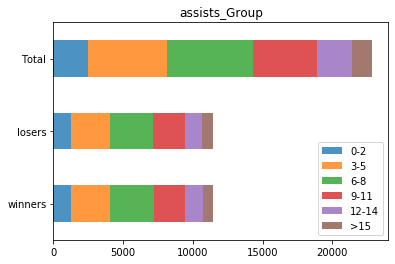

In [291]:
winners = merged_table[merged_table['won']==True]['assists_Group'].value_counts() # category that has survived people
losers = merged_table[merged_table['won']==False]['assists_Group'].value_counts() # category that has people not survived
total = winners + losers
df3 = pd.DataFrame([winners,losers,total]) #creates a suvrvived and not survived dataframe based on category chose in function
df3.index = ['winners','losers','Total']
df3
df3.plot(kind='barh',stacked=True,title='assists_Group',alpha=0.8)


In [292]:
merged_table

,game_id,won,team_id_x,team_id_y,assists,assists_Group
0,2011030221,False,1,1,4,6-8
1,2011030221,True,4,4,6,9-11
2,2011030222,True,1,1,6,9-11
3,2011030222,False,4,4,2,3-5
4,2011030223,False,4,1,7,9-11
...,...,...,...,...,...,...
22863,2018030415,False,6,19,4,6-8
22864,2018030416,True,6,6,6,9-11
22865,2018030416,False,19,19,2,3-5
22866,2018030417,True,19,6,1,0-2


In [300]:
#i = 0
#for index, row in merged_table.iterrows():
    #x = merged_table.loc[[i+1],['game_id']]# == merged_table.loc[[i+1],['game_id']]:
    #y = merged_table.loc[[i+1],['game_id']]
    #i+=1
    #print(x)#print('hk')
merged_table['who_wins'] = 'same assists'
for i in range(1,len(merged_table)):
    if merged_table.game_id.loc[i] == merged_table.game_id.loc[i-1]:
        #print(merged_table.game_id.loc[[i,i-1]])
        x = merged_table.assists.loc[i]   # store next value of assists in x
        y = merged_table.assists.loc[i-1]   # store prev value of assists in y
        #if merged_table.won.loc[i] == True : # x corresponds to [i] y corresponds to [i-1]
           # if x > y:
            #    merged_table['who wins']='more assists win'
                #print('more assists win')
           # else:
                #print('less assists win')
           #     merged_table['who wins']='less assists win'
       # elif merged_table.won.loc[i-1] == True:
        #    if y > x:
                #print('more assists win')
         #       merged_table['who wins']='more assists win'
          #  else:
                #print('less assists win')
           #     merged_table['who wins']='more assists win'
# these if statements decide for same game ID (if done before) if the winner has more assists comment, otherwise comment on less assists winn
        if merged_table.won.loc[i] == True and x > y:
            merged_table['who_wins'].loc[i] = 'more assists win'
            merged_table['who_wins'].loc[i-1] = 'more assists win'
            
        elif merged_table.won.loc[i-1] == True and y > x:
            merged_table['who_wins'].loc[i] = 'more assists win'
            merged_table['who_wins'].loc[i-1] = 'more assists win'
            
        elif merged_table.won.loc[i] == False and x > y:
            merged_table['who_wins'].loc[i-1] = 'less assists win'
            merged_table['who_wins'].loc[i] = 'less assists win'
            
        elif merged_table.won.loc[i-1] == False and y > x:
            merged_table['who_wins'].loc[i-1] = 'less assists win'
            merged_table['who_wins'].loc[i] = 'less assists win'

        #else:
         #     merged_table['who wins'] = 'less assists win'  

In [301]:
merged_table

,game_id,won,team_id_x,team_id_y,assists,assists_Group,who_wins
0,2011030221,False,1,1,4,6-8,more assists win
1,2011030221,True,4,4,6,9-11,more assists win
2,2011030222,True,1,1,6,9-11,more assists win
3,2011030222,False,4,4,2,3-5,more assists win
4,2011030223,False,4,1,7,9-11,less assists win
...,...,...,...,...,...,...,...
22863,2018030415,False,6,19,4,6-8,less assists win
22864,2018030416,True,6,6,6,9-11,more assists win
22865,2018030416,False,19,19,2,3-5,more assists win
22866,2018030417,True,19,6,1,0-2,less assists win


In [310]:
merged_table.loc[merged_table['who_wins'] == 'less assists win']

,game_id,won,team_id_x,team_id_y,assists,assists_Group,who_wins
4,2011030223,False,4,1,7,9-11,less assists win
5,2011030223,True,1,4,6,9-11,less assists win
6,2011030224,False,4,1,7,9-11,less assists win
7,2011030224,True,1,4,3,3-5,less assists win
10,2011030411,True,26,1,2,3-5,less assists win
...,...,...,...,...,...,...,...
22857,2018030412,False,6,19,5,6-8,less assists win
22862,2018030415,True,19,6,1,0-2,less assists win
22863,2018030415,False,6,19,4,6-8,less assists win
22866,2018030417,True,19,6,1,0-2,less assists win


In [311]:
merged_table.loc[merged_table['who_wins'] == 'same assists']

,game_id,won,team_id_x,team_id_y,assists,assists_Group,who_wins
12,2011030412,True,26,1,2,3-5,same assists
13,2011030412,False,1,26,2,3-5,same assists
42,2012030224,False,6,3,6,9-11,same assists
43,2012030224,True,3,6,6,9-11,same assists
90,2012030236,True,16,16,5,6-8,same assists
...,...,...,...,...,...,...,...
22725,2018030172,False,20,21,4,6-8,same assists
22750,2018030124,True,6,6,8,12-14,same assists
22751,2018030124,False,10,10,8,12-14,same assists
22848,2018030324,False,28,19,2,3-5,same assists


In [323]:
winners = merged_table.groupby('who_wins')['won'].count()
winners

who_wins
less assists win    10342
more assists win    10388
same assists         2138
Name: won, dtype: int64

Text(0, 0.5, 'Counts of wins')

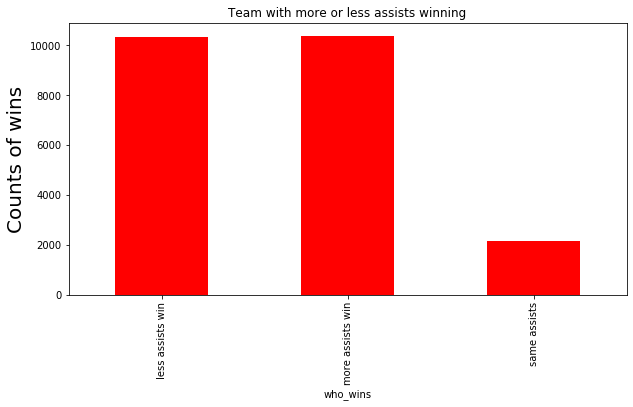

In [344]:
plt.figure()
ax = winners.plot.bar(color='r',title='Team with more or less assists winning',fontsize = 10,figsize=(10,5))
ax.set_ylabel('Counts of wins',fontsize=20)